In [1]:
!pip install matplotlib==3.4.3
!pip install --upgrade statsmodels

     ---------------------------------------- 7.1/7.1 MB 3.1 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1


In [2]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import random
import math

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation
import altair as alt                                # Alternative visualisation system

from statsmodels.graphics.mosaicplot import mosaic

### Exercise 1

The file lightbulbs.csv contains a random sample of
100 lightbulb lifetimes. The company that produces
these lightbulbs wants to know whether it can claim
that its lightbulbs typically last more than 1000 burning
hours.
1. Identify the null and alternative hypotheses for this
situation.
2. Can this lightbulb manufacturer claim that its
lightbulbs typically last more than 1000 hours at
the 5% significance level? What about at the 1%
significance level?


In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/Lightbulbs.csv', sep=";")
df.columns

Index(['Lightbulb', 'Lifetime'], dtype='object')

In [14]:
alpha = 0.05

n = df.Lifetime.count()
sm = df.Lifetime.mean()
s = df.Lifetime.std()
s_sample = s / np.sqrt(n)
m0 = 1000

In [8]:
sm

991.0186000000001

In [15]:
p = stats.norm.cdf(sm, loc=m0, scale=s_sample) # Let op! cdf() ipv sf()!
print("p-waarde: %.5f" % p)
if(p < alpha):
    print("p < a, dus H0 verwerpen")
else:
    print("p > a, dus H0 niet verwerpen")

p-waarde: 0.15142
p > a, dus H0 niet verwerpen


In [17]:
g = m0 - stats.norm.isf(alpha) * s_sample
print("Critical value g ≃ %.3f" % g)
if (sm > g):
    print("sample mean = %.3f > g = %.3f: do not reject H0" % (sm, g))
else:
    print("sample mean = %.3f < g = %.3f: reject H0" % (sm, g))

Critical value g ≃ 985.662
sample mean = 991.019 > g = 985.662: do not reject H0


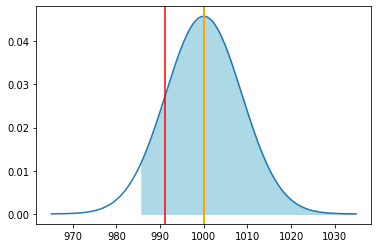

In [18]:
# Gauss-curve:
# X-values
dist_x = np.linspace(m0 - 4 * s/np.sqrt(n), m0 + 4 * s/np.sqrt(n), num=201)
# Y-values
dist_y = stats.norm.pdf(dist_x, m0, s/np.sqrt(n))
fig, dplot = plt.subplots(1, 1)
# Plot
dplot.plot(dist_x, dist_y)
# Hypothetical population mean in orange
dplot.axvline(m0, color="orange", lw=2)
# Sample mean in red
dplot.axvline(sm, color="red")

# Fill the acceptance region in light blue
dplot.fill_between(dist_x, 0, dist_y, where=dist_x >= g, color='lightblue')

### Exercise 2

The file Low calorie soft drinks.csv categorizes 250 randomly
selected consumers on the basis of their gender, their
age, and their preference for our brand or a competitor's
brand of a low-calorie soft drink.   
First make a stacked barplot.  
Then use a test to see whether the drink
preference is independent of gender.

In [40]:
excercise2 = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/Low%20calorie%20soft%20drinks.csv', sep=";")
excercise2.head()

,Consumer,Gender,Age,Preference
0,1,F,Over 60,Our brand
1,2,F,Between 40 and 60,Our brand
2,3,M,Between 40 and 60,Our brand
3,4,F,Over 60,Competing brand
4,5,M,Between 20 and 40,Our brand


<AxesSubplot:xlabel='Gender'>

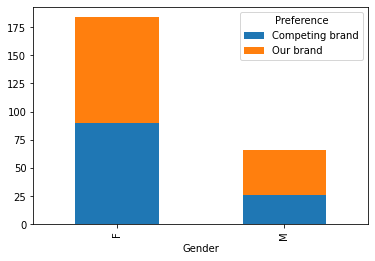

In [41]:
excercise2.groupby(['Gender', 'Preference']).size().unstack().plot(kind='bar', stacked=True)

In [42]:
observed = pd.crosstab(excercise2.Gender, excercise2.Preference)
chi2, p, df, expected = stats.chi2_contingency(observed)

print("Chi-squared       : %.4f" % chi2)
print("Degrees of freedom: %d" % df)
print("P-value           : %.4f" % p)

Chi-squared       : 1.4078
Degrees of freedom: 1
P-value           : 0.2354


In [43]:
cramers_v = np.sqrt(chi2 / (df * n))
print(f'CramerV: {cramers_v}')

CramerV: 0.11864963226958096


# Exercise 3
The owner of Original Italian Pizza restaurant chain
wants to understand which variable most strongly
influences the sales of his specialty deep-dish
pizza. He has gathered data on the monthly sales of
deep-dish pizzas at his restaurants and observations on
other potentially relevant variables for each of several
outlets in central Indiana. These data are provided in
the file pizzas.csv. Estimate a simple linear regression
equation between the quantity sold (Y) and each
of the following candidates for the best explanatory
variable: average price of deep-dish pizzas, monthly
advertising expenditures, and disposable income per
household in the areas surrounding the outlets. Which
variable is most strongly associated with the number
of pizzas sold? Explain your choice.  
Start by transforming the text values to a float. Divide Quantity Sold, Monthly Advertising Expenditures and Disposable Income Per Househols by 100.  
Make a plot  

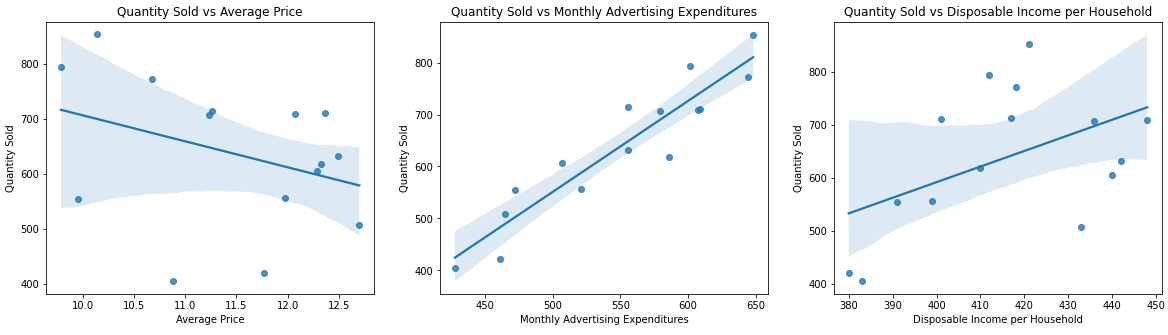

In [35]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/pizzas.csv', sep=";")
df.head()

,Outlet Number,Quantity Sold,Average Price,Monthly Advertising Expenditures,Disposable Income per Household
0,1,85 300,"$10,14",$64 800,$42 100
1,2,40 500,"$10,88",$42 800,$38 300
2,3,61 800,"$12,33",$58 600,$41 000
3,4,50 800,"$12,70",$46 500,$43 300
4,5,60 600,"$12,29",$50 700,$44 000


In [11]:
df.dtypes

Outlet Number                        int64
Quantity Sold                       object
Average Price                       object
Monthly Advertising Expenditures    object
Disposable Income per Household     object
dtype: object

In [36]:
df['Quantity Sold'] = df['Quantity Sold'].str.replace(' ','').astype('int')
df['Average Price'] = df['Average Price'].str.replace('$','').str.replace(',','.').astype('float64')
df['Monthly Advertising Expenditures'] = df['Monthly Advertising Expenditures'].str.replace('$','').str.replace(' ','').astype('int')
df['Disposable Income per Household'] = df['Disposable Income per Household'].str.replace('$','').str.replace(' ','').astype('int')

C:\Users\dylan\AppData\Local\Temp\ipykernel_36680\2372293434.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Average Price'] = df['Average Price'].str.replace('$','').str.replace(',','.').astype('float64')
C:\Users\dylan\AppData\Local\Temp\ipykernel_36680\2372293434.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Monthly Advertising Expenditures'] = df['Monthly Advertising Expenditures'].str.replace('$','').str.replace(' ','').astype('int')
C:\Users\dylan\AppData\Local\Temp\ipykernel_36680\2372293434.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* b

0.12264261818357283

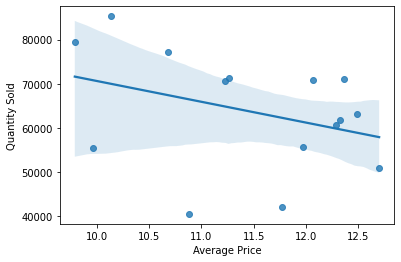

In [40]:
sns.regplot(y=df['Quantity Sold'],x=df['Average Price'])

corr = np.corrcoef(df['Quantity Sold'], df['Average Price'])[0][1]
corr

corr**2

0.8723455396607301

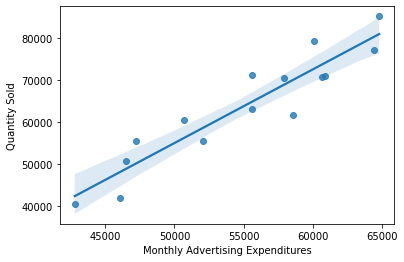

In [42]:
sns.regplot(x=df['Monthly Advertising Expenditures'],y=df['Quantity Sold'])

corr = np.corrcoef(x=df['Monthly Advertising Expenditures'],y=df['Quantity Sold'])[0][1]
corr

corr**2

0.23375607098506285

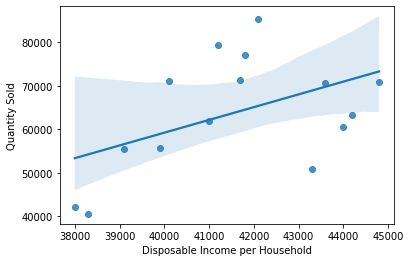

In [43]:
sns.regplot(y=df['Quantity Sold'],x=df['Disposable Income per Household'])

corr = np.corrcoef(df['Quantity Sold'], df['Disposable Income per Household'])[0][1]
corr

corr**2